Chart of Data:
   Group 2 No Stimulation  Group 2 Spike  Group 3 N-term  Group 4 C-term
0                    0.19           0.49            0.10           0.095
1                    0.11           0.39             NaN           0.140
2                    0.29           0.44            0.55           0.710

---------------------------Means for each group and Standard Deviation-------------------------------
-------------Means-------------
Group 2 No Stimulation    0.196667
Group 2 Spike             0.440000
Group 3 N-term            0.325000
Group 4 C-term            0.315000
dtype: float64
-------------Standard Deviation-------------
Group 2 No Stimulation    0.090185
Group 2 Spike             0.050000
Group 3 N-term            0.318198
Group 4 C-term            0.342819
dtype: float64
---------------Pearson's Chi-Squared Test----------------
--------------Interpreting alpha at 0.05---------------
Independent (H0 holds true)
--------------Interpreting alpha at 0.005---------------
Inde

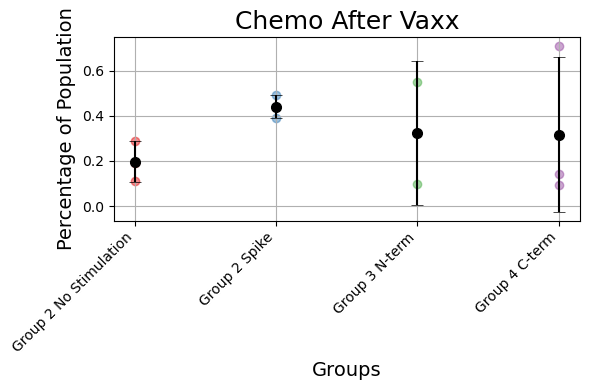

<Figure size 640x480 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns

# Place the file path here (replace csv filename)
csv_file = "group2.csv"

# Define the title and axis labels
title = 'Chemo After Vaxx'
xlabel = 'Groups'
ylabel = 'Percentage of Population'

# Load the CSV data into a DataFrame
data = pd.read_csv(csv_file, sep=',', header=0, na_values=".")

# Print basic information about the data
print("Chart of Data:")
print(data)

# Means of columns
column_means = data.mean()
column_stdv = data.std()

print("\n---------------------------Means for each group and Standard Deviation-------------------------------")
print("-------------Means-------------")
print(column_means)
print("-------------Standard Deviation-------------")
print(column_stdv)

# Perform Chi-squared test
print("---------------Pearson's Chi-Squared Test----------------")
chi2_result = chi2_contingency(data)
p = chi2_result[1]
alpha_levels = [0.05, 0.005, 0.0005]

for alpha in alpha_levels:
    print(f"--------------Interpreting alpha at {alpha}---------------")
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

# Create a single plot for all columns
fig, ax = plt.subplots(figsize=(6, 4))

# Set a list of colors for each column
colors = sns.color_palette("Set1", len(data.columns))

# Plot the data points with different colors for each column
for idx, col in enumerate(data.columns):
    col_data = data[col]
    col_mean = col_data.mean()
    col_stdv = col_data.std()
    ax.plot(idx, col_mean, color='black', marker='o', markersize=7)
    ax.errorbar(idx, col_mean, yerr=col_stdv, color='black', capsize=4, capthick=0.5)
    ax.scatter([idx] * len(col_data), col_data, color=colors[idx], alpha=0.5)

ax.set_title(title, fontsize=18)
ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)
plt.xticks(range(len(data.columns)), data.columns, rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

# Save the plot as 'figure1.png'
plt.savefig("figure1.png")

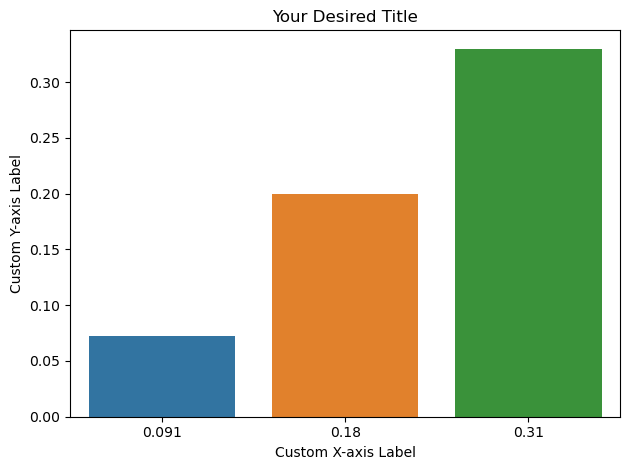

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Place the file path here (replace csv filename)
csv_file = "controls.csv"
data = pd.read_csv(csv_file, sep=',', header=0, na_values=".")

# Get the column names from the DataFrame
all_columns = data.columns.tolist()

# Assuming you want the first column as the x-axis and the second column as the y-axis
x_column = all_columns[-1]
y_column = all_columns[1]

# Define the title and axis labels
title = 'Your Desired Title'
x_label = 'Custom X-axis Label'
y_label = 'Custom Y-axis Label'

# Plot the data using the specified x and y columns with error bars
sns.barplot(data=data, x=x_column, y=y_column, errorbar='sd')
ax.errorbar(idx, col_mean, yerr=col_stdv, color='black', capsize=4, capthick=0.5)

# Set the plot title and custom axis labels
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
